# AI-Generated DANDI Notebook: Caution Advised

***This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified. Use caution when interpreting the code or results.***

This notebook provides a starting point for exploring and analyzing data from Dandiset 001275, "Mental navigation primate PPC Neupane_Fiete_Jazayeri."

The purpose of this notebook is to illustrate how to access and visualize data, not to draw scientific conclusions.

Before running this notebook, make sure you have the following packages installed:
```bash
pip install pynwb lindi matplotlib seaborn dandi
```

In [1]:
# Import necessary libraries
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

## 1. Introduction to the Dandiset

Dandiset 001275, named "Mental navigation primate PPC Neupane_Fiete_Jazayeri," contains neurophysiology data collected from two primates during a mental navigation task.
The data is associated with a previously published study (https://doi.org/10.1038/s41586-024-07557-z).

The dataset includes data from the entorhinal cortex.

Key metadata:
- **Name:** Mental navigation primate PPC Neupane_Fiete_Jazayeri
- **Description:** This dataset contains neurophysiology data collected from two primates during a mental navigation task
- **License:** CC-BY-4.0
- **Contributors:** Neupane, Sujaya
- **Measurement Technique:** multi electrode extracellular electrophysiology recording technique

## 2. Dataset Structure Exploration

First, let's use the DANDI API to list all of the assets in the Dandiset.

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())
print(f"Number of assets in the dandiset: {len(assets)}")
for asset in assets:
    print(asset.path)

Number of assets in the dandiset: 20
sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03122021_ecephys.nwb
sub-mahler/sub-mahler_ses-03172021_ecephys.nwb
sub-mahler/sub-mahler_ses-03152021_ecephys.nwb
sub-mahler/sub-mahler_ses-03192021_ecephys.nwb
sub-mahler/sub-mahler_ses-03182021_ecephys.nwb
sub-amadeus/sub-amadeus_ses-06242019_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-06302020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-07032020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-07082020_behavior+ecephys.nwb
sub-amadeus/sub-amadeus_ses-06242019_ecephys.nwb
sub-amadeus/sub-amadeus_ses-01042020_ecephys.nwb
sub-amadeus/sub-amadeus_ses-06302020_ecephys.nwb
sub-amadeus

## 3. Accessing and Visualizing Sample Data from NWB Files

We will load data from the NWB file: `sub-amadeus/sub-amadeus_ses-01042020_ecephys.nwb`. This file contains extracellular electrophysiology data.

In [3]:
# Load the NWB file
try:
    f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001275/assets/0bbd0039-0f40-4eb2-b67a-93802fb3b28d/nwb.lindi.json")
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
except Exception as e:
    print(f"Error loading NWB file: {e}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's inspect the contents of the NWB file.

In [4]:
nwb.session_description

'Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.'

In [5]:
nwb.identifier

'1ff1b4c0-6579-43c9-abcc-1cf4626ee781'

In [6]:
nwb.session_start_time

datetime.datetime(2020, 1, 4, 0, 0, tzinfo=tzoffset(None, -18000))

Now we can load the ElectricalSeries data.

In [7]:
# Get the ElectricalSeries object
try:
    electrical_series = nwb.acquisition["ElectricalSeriesVP0"]
    data = electrical_series.data
    rate = electrical_series.rate
    electrodes = electrical_series.electrodes
    electrode_ids = electrodes["id"].data[:]

except Exception as e:
    print(f"Error accessing ElectricalSeries data: {e}")

The shape of the data is:

In [8]:
data.shape

(208309760, 32)

The sampling rate is:

In [9]:
rate

30000.0

The electrode IDs are:

In [10]:
electrode_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

Let's plot a small subset of the data to visualize the neural activity. We will plot 4 channels for 1000 timepoints.

In [11]:
# Select a subset of channels and time points
num_channels = 4
num_timepoints = 1000
start_channel = 0
start_time = 0

# Extract the data subset
try:
    subset_channels = electrode_ids[start_channel:start_channel + num_channels]
    channel_indices = np.where(np.isin(electrodes["id"].data[:], subset_channels))[0]
    subset_data = data[start_time:start_time + num_timepoints, channel_indices]
    time = np.arange(start_time, start_time + num_timepoints) / rate
except Exception as e:
    print(f"Error extracting data subset: {e}")

/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_base.py:2985: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


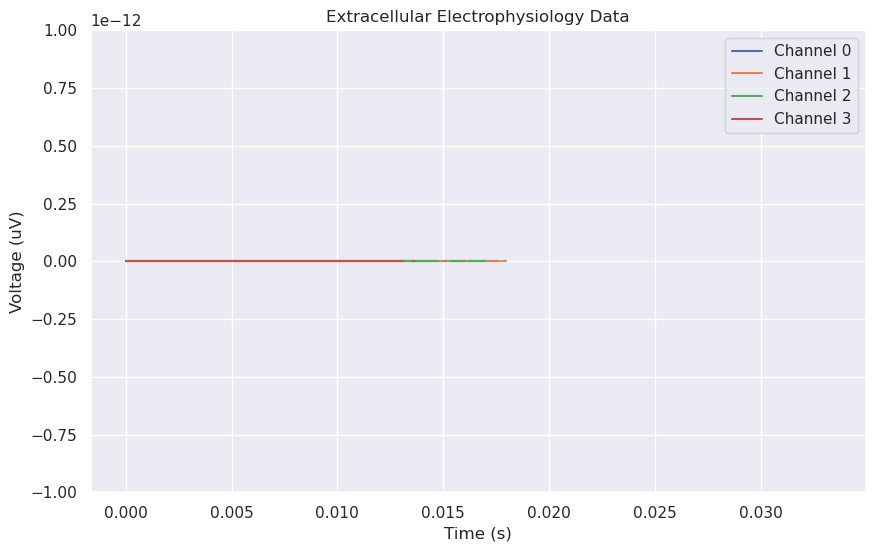

In [12]:
# Plot the data
try:
    plt.figure(figsize=(10, 6))
    for i in range(num_channels):
        plt.plot(time, subset_data[:, i], label=f"Channel {subset_channels[i]}")

    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (uV)")
    plt.title("Extracellular Electrophysiology Data")
    plt.legend()
    plt.show() # displaying plot in notebook
    # plt.savefig("tmp_scripts/ecephys_plot.png")
    plt.close()

except Exception as e:
    print(f"Error plotting data: {e}")

The plot shows the voltage for four channels over time. The voltage for each channel remains close to zero during this time.

## 4. Example Analyses

Here are some examples of common analyses that might be relevant to this dataset:

- Spike sorting
- Local field potential (LFP) analysis
- Analysis of neural activity during the mental navigation task

This notebook provides a basic introduction to the Dandiset and demonstrates how to access and visualize the data.